In [5]:
import glob
import os.path
import cv2
import numpy as np
import csv
from line_method import click_event, coordinates_on_line
""""
This part is to show dots of pixellocations for all swellingImages, without clickingevents (below; to obtain required sizes in pixels etc.).
"""
##linmethod: pointa = 2208, 1344;    pointb = 1824, 1425
# Read RGB image
source = 'E:\\2023_02_17_PLMA_DoDecane_Basler2x_Xp1_24_S9_splitv2____DECENT_movedCameraEarly\\B_Analysis\\PROC_20230710212856'
imgList = [f for f in glob.glob(os.path.join(source, f"rawslicesimage\\*.png"))]
pixellocationLarge = [2000, 2050, 2060, 2100, 2150, 2200, 2250]#2170
n = 0
nAllImages = np.arange(0, len(imgList),1)
for imgPath in imgList:
    if n in nAllImages:
        #img = cv2.imread(os.path.join(source, 'rawslicesimage\\rawslicesimage_Basler_a2A5328-15ucBAS__40087133__20230217_110816090_0009_analyzed_.png'))
        img = cv2.imread(imgPath)
        csvList = [f for f in glob.glob(os.path.join(source, f"csv\\*unwrapped.csv"))]

        #imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\Documents\\InterferometryPython\\red square.png')
        imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\PycharmProjects\\InterferometryPython\\red square.png')
        resizedimg = cv2.resize(img, [2400, 1500], interpolation = cv2.INTER_AREA)
        squareSize = 5
        resizedImagBlack = cv2.resize(imgblack, [squareSize, squareSize], interpolation = cv2.INTER_AREA)

        def calcLineEquation(x_coords, y_coords):       #For eq   y = ax +b
            aL = (y_coords[1]-y_coords[0])/(x_coords[1]-x_coords[0])    #a = dy /dx
            bL = y_coords[0] - aL * x_coords[0]                          #b = y(x) - a*x
            return aL, bL
        def calcLineLength(edge1, edge2):   #edge1(x,y)    edge2(x,y)
            return ((edge2[0] - edge1[0])**2 + (edge2[1] - edge1[1])**2 )**0.5
        def readInDataLengthLargeImage(csvList):
            with open(csvList[0]) as f:
                summation = sum(1 for line in f)
            return summation-1

        # P1 = [465, 612]     #x,y
        # P2 = [1737, 342]    #x,y

        P1 = [467, 611]     #x,y
        P2 = [1933, 302]    #x,y
        a, b = calcLineEquation([P1[0], P2[0]], [P1[1], P2[1]])
        limits = [466, 1937, 112, 1385]     #xmin xmin ymin ymax of image in plot. Should always be same
        l = calcLineLength(P1, P2)
        print(f"Image in plot: length calculated is {l} from edges")

        x_coords = [2208, 1344]
        y_coords = [1824, 1425]
        aL, bL = calcLineEquation(x_coords, y_coords)
        print(f"(Large plot). a ={aL}, b = {bL}")
        lLarge = readInDataLengthLargeImage(csvList)    #read in OG image data length of line from counting rows in csv file

        ratioLines = lLarge / l
        for pixelLocation in pixellocationLarge:
            pixelLocNew = pixelLocation / ratioLines
            print(f"ratioLines = {ratioLines}, pixelLocLarge = {pixelLocation}, pixelLocNew = {pixelLocNew}")

            c = pixelLocNew     #c = length of line (schuine zijde)
            x_offset = round(c / (np.sqrt(1+a**2)) + 466 - squareSize/2)            #-squareSize/2 to centre it
            pixely = round(a*(x_offset) + b)
            y_offset = pixely
            print(f"pixelLocNew={pixelLocNew} x={x_offset}, y = {y_offset}")
            resizedimg[y_offset:y_offset+resizedImagBlack.shape[0], x_offset:x_offset+resizedImagBlack.shape[1]] = resizedImagBlack

        if not os.path.exists(os.path.join(source, f"rawslicesimage\\pixelLocation")):
            os.mkdir(os.path.join(source, f"rawslicesimage\\pixelLocation"))
        cv2.imwrite(os.path.join(source, f"rawslicesimage\\pixelLocation\\rawlsiceimageWithPixelLocation{n}.png") , resizedimg)
    n = n+1


Im working
Amount of images in folder: 1448
To be used amount of images: 2
Image in plot: length calculated is 1498.2112668111931 from edges
(Large plot). a =0.4618055555555556, b = 804.3333333333333
ratioLines = 4.476004251572018, pixelLocLarge = 0, pixelLocNew = 0.0
pixelLocNew=0.0 x=464, y = 612
ratioLines = 4.476004251572018, pixelLocLarge = 2550, pixelLocNew = 569.7045526943846
pixelLocNew=569.7045526943846 x=1021, y = 494
ratioLines = 4.476004251572018, pixelLocLarge = 6707, pixelLocNew = 1498.4346803612696
pixelLocNew=1498.4346803612696 x=1930, y = 303
Image in plot: length calculated is 1498.2112668111931 from edges
(Large plot). a =0.4618055555555556, b = 804.3333333333333
ratioLines = 4.476004251572018, pixelLocLarge = 0, pixelLocNew = 0.0
pixelLocNew=0.0 x=464, y = 612
ratioLines = 4.476004251572018, pixelLocLarge = 2550, pixelLocNew = 569.7045526943846
pixelLocNew=569.7045526943846 x=1021, y = 494
ratioLines = 4.476004251572018, pixelLocLarge = 6707, pixelLocNew = 1498.4346

In [1]:
import glob
import os.path
import cv2
import numpy as np
import csv
from line_method import click_event, coordinates_on_line


##linmethod: pointa = 2208, 1344;    pointb = 1824, 1425
# Read RGB image
source = 'E:\\2023_02_17_PLMA_DoDecane_Basler2x_Xp1_24_S9_splitv2____DECENT_movedCameraEarly\\B_Analysis\\PROC_20230710212856'
img = cv2.imread(os.path.join(source, 'rawslicesimage\\rawslicesimage_Basler_a2A5328-15ucBAS__40087133__20230217_110816090_0009_analyzed_.png'))
csvList = [f for f in glob.glob(os.path.join(source, f"csv\\*unwrapped.csv"))]

#imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\Documents\\InterferometryPython\\red square.png')
imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\PycharmProjects\\InterferometryPython\\red square.png')
resizedimg = cv2.resize(img, [2400, 1500], interpolation = cv2.INTER_AREA)
squareSize = 5
resizedImagBlack = cv2.resize(imgblack, [squareSize, squareSize], interpolation = cv2.INTER_AREA)
pixellocationLarge = [0, 5436, 2718]#2170

def calcLineEquation(x_coords, y_coords):       #For eq   y = ax +b
    aL = (y_coords[1]-y_coords[0])/(x_coords[1]-x_coords[0])    #a = dy /dx
    bL = y_coords[0] - aL * x_coords[0]                          #b = y(x) - a*x
    return aL, bL
def calcLineLength(edge1, edge2):   #edge1(x,y)    edge2(x,y)
    return ((edge2[0] - edge1[0])**2 + (edge2[1] - edge1[1])**2 )**0.5
def readInDataLengthLargeImage(csvList):
    with open(csvList[0]) as f:
        summation = sum(1 for line in f)
    return summation-1


# P1 = [465, 612]     #x,y
# P2 = [1737, 342]    #x,y

P1 = [467, 611]     #x,y
P2 = [1933, 302]    #x,y
a, b = calcLineEquation([P1[0], P2[0]], [P1[1], P2[1]])
limits = [466, 1937, 112, 1385]     #xmin xmin ymin ymax of image in plot. Should always be same
l = calcLineLength(P1, P2)
print(f"Image in plot: length calculated is {l} from edges")

x_coords = [2208, 1824]
y_coords = [1344, 1425]
aL, bL = calcLineEquation(x_coords, y_coords)
print(f"(Large plot). a ={aL}, b = {bL}")
lLarge = readInDataLengthLargeImage(csvList)    #read in OG image data length of line from counting rows in csv file

ratioLines = lLarge / l
for pixelLocation in pixellocationLarge:
    pixelLocNew = pixelLocation / ratioLines
    print(f"ratioLines = {ratioLines}, pixelLocLarge = {pixelLocation}, pixelLocNew = {pixelLocNew}")

    c = pixelLocNew     #c = length of line (schuine zijde)
    x_offset = round(c / (np.sqrt(1+a**2)) + 466 - squareSize/2)            #-squareSize/2 to centre it
    pixely = round(a*(x_offset) + b)
    y_offset = pixely
    print(f"pixelLocNew={pixelLocNew} x={x_offset}, y = {y_offset}")
    resizedimg[y_offset:y_offset+resizedImagBlack.shape[0], x_offset:x_offset+resizedImagBlack.shape[1]] = resizedImagBlack

cv2.imshow('image', resizedimg)
right_clicks = []
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        right_clicks.append([x, y])
    if len(right_clicks) == 2:
        cv2.destroyAllWindows()

cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)

P1 = np.array(right_clicks[0])
P2 = np.array(right_clicks[1])
print(f"Selected coordinates: {P1=}, {P2=}.")
print(f"Selected coordinates: P1 = [{P1[0]:.0f}, {P1[1]:.0f}], P2 = [{P2[0]:.0f}, {P2[1]:.0f}]")

cv2.destroyAllWindows()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [1]:
#For plotting of the 3-d height profiles. Import a pickle file with coordinates & z height saved
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
from matplotlib.animation import FFMpegWriter

ffmpegPath = 'C:\\Users\\Sander PC\\Desktop\\ffmpeg-7.1-essentials_build\\bin\\ffmpeg.exe'      #thuis PC
plt.rcParams['animation.ffmpeg_path'] = ffmpegPath
metadata2 = dict(title='3D Height Movie', artist='Sjendieee')
writer2 = FFMpegWriter(fps=10, metadata=metadata2)
#from z-axis= [1400um -> 1.4mm]
#from viewinit (30, 130) -> (0, 130)
#from (zlim = [0, 1800]) -> (zlim = [0, 1.8])

zmaxrange = 1800 * (1 / np.linspace(1000, 1, 50))
viewrange = np.linspace(30, 5, 50)

conversionXY = 0.0005446623093681918    #pixels
cmap_minval = 0
cmap_maxval = 1
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(xlabel = 'x-distance (mm)', ylabel = 'y-distance (mm)', zlabel = 'Height (nm)', title = f'Spatial Height Profile Colormap')
data = pickle.load(open("plot3d_data.pickle", 'rb'))
with writer2.saving(fig, "h_profile_realistic.mp4", 300):
    for k in range(0,len(zmaxrange)):
        for i in range(0,len(data[0])):
            x = np.array(data[0][i]) * conversionXY  #convert pixels -> mm
            y = np.array(data[1][i]) * conversionXY #convert pixels -> mm
            z = np.array(data[2][i]) / 1000  #convert nm->um
            ax.scatter(x,y,z, c=z, cmap='jet', edgecolor='none')
            if min(z) < cmap_minval:
                cmap_minval = min(z)
            if max(z) > cmap_maxval:
                cmap_maxval = max(z)
        ax.set(zlim = [0, zmaxrange[k]])
        #cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm = plt.Normalize(cmap_minval, cmap_maxval), cmap = 'jet'), label='height (nm)', orientation='vertical')
        #ax.view_init(viewrange[k], 130)
        ax.view_init(viewrange[k], -60)
        if k == (len(zmaxrange)-1):
            ax.set(xlabel = 'x-distance (mm)', ylabel = 'y-distance (mm)', zlabel = 'Height (um)', title = f'Spatial Height Profile Colormap')
            fig.savefig('temp.png', dpi=300)
        else:
            ax.set(xlabel = 'x-distance (mm)', ylabel = 'y-distance (mm)', title = f'Spatial Height Profile Colormap')
        writer2.grab_frame()
        ax.clear()

    for k in 49*np.ones(10, dtype='int'):
        for i in range(0,len(data[0])):
            x = np.array(data[0][i]) * conversionXY  #convert pixels -> mm
            y = np.array(data[1][i]) * conversionXY #convert pixels -> mm
            z = np.array(data[2][i]) / 1000  #convert nm->um
            ax.scatter(x,y,z, c=z, cmap='jet', edgecolor='none')
            if min(z) < cmap_minval:
                cmap_minval = min(z)
            if max(z) > cmap_maxval:
                cmap_maxval = max(z)
        ax.set(zlim = [0, zmaxrange[k]])
        #cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm = plt.Normalize(cmap_minval, cmap_maxval), cmap = 'jet'), label='height (nm)', orientation='vertical')
        #ax.view_init(viewrange[k], 130)
        ax.view_init(viewrange[k], -60)
        if k == (len(zmaxrange)-1):
            ax.set(xlabel = 'x-distance (mm)', ylabel = 'y-distance (mm)', zlabel = 'Height (um)', title = f'Spatial Height Profile Colormap')
            fig.savefig('temp.png', dpi=300)
        else:
            ax.set(xlabel = 'x-distance (mm)', ylabel = 'y-distance (mm)', title = f'Spatial Height Profile Colormap')
        writer2.grab_frame()
        ax.clear()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021F5D9B5E50> (for post_execute):



KeyboardInterrupt



!Some value could not be casted to a float. Whether that is an issue or not is up to the user.!
!Some value could not be casted to a float. Whether that is an issue or not is up to the user.!
!Some value could not be casted to a float. Whether that is an issue or not is up to the user.!
!Some value could not be casted to a float. Whether that is an issue or not is up to the user.!
Desired lineLength = 40.84967320261438$\mu$
Distance overlapindex to end: 39.30 $\mu$
Total line length: 242.54 $\mu$
Distance overlapindex to end: 39.33 $\mu$
Total line length: 362.08 $\mu$
Distance overlapindex to end: 39.76 $\mu$
Total line length: 287.74 $\mu$
Distance overlapindex to end: 39.59 $\mu$
Total line length: 193.49 $\mu$


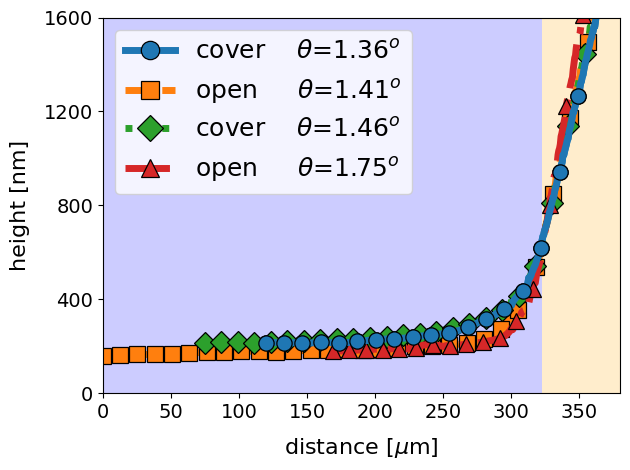

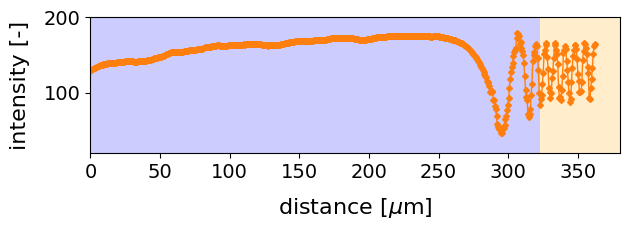

In [72]:
"""
Same as above, but with nicest labels etc for figure making
-Shift x such that all lines overlap on the CL index, as obtained from the contour finding
-Shift y such that at the index of the 3d minimum of each intensity profile overlap overlap in y direction
Specifically for : D:\\2025-01-21 PLMA dodecane Xp1_32_3BiBB ZeissBasler15uc 5x M1 moving drop tilted cover - MOVING RIGHT LEFT\\Swellingimages"
n=41
data_n=41_k={nr}_t=6min 49s_anchor30_PureIntensity"
"""
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
#from Testing_ToCollapseCode.py import matchingCAIntensityPeak
from matplotlib.ticker import MultipleLocator

path = "D:\\2025-01-21 PLMA dodecane Xp1_32_3BiBB ZeissBasler15uc 5x M1 moving drop tilted cover - MOVING RIGHT LEFT\\Swellingimages"
conversionXY = 0.0005446623093681918
linenNrs = [2679, 4148, 5735, 8456]
CAs = [1.458, 1.363, 1.753, 1.411]
i_of_3dminimum = np.array([450, 331, 278, 558])        #for y / height shift
i_CL = [449, 331, 276, 558]      # index of CL position (chosen from the contour finding)  for x/distance shift
labelinfo = ["cover", "cover", "open", "open"]

colormap = 'seismic'
colors = np.linspace(0,1,4)
cmap1 = plt.get_cmap(colormap)

CAs, linenNrs, i_of_3dminimum, i_CL, labelinfo = [list(a) for a in zip(*sorted(zip(CAs, linenNrs, i_of_3dminimum, i_CL, labelinfo)))]



csv_filenames = lambda nr: f"data_n=41_k={nr}_t=6min 49s_anchor30_PureIntensity.csv"

xdata_tot, ydata_tot = [], []
I_data_tot = []
xmax = 0
y_atCL = []     #y value at CL position (hardcoded at x, e.g. 50, indices from the end-of-list)
#Import the data from csv files
for i, linenNr in enumerate(linenNrs):
    file = open(os.path.join(path, csv_filenames(linenNr)))
    csvreader = csv.reader(file)
    xdata = []
    ydata = []
    I_data = []
    for row in csvreader:
        try:
            xdata.append(float(row[0]))   #x range [um]
            ydata.append(float(row[3]))   #height [nm]
            I_data.append(float(row[1]))
        except:
            print("!Some value could not be casted to a float. Whether that is an issue or not is up to the user.!")
    file.close()
    xdata_tot.append(xdata)
    ydata_tot.append(ydata)
    I_data_tot.append(I_data)
    if max(xdata) > xmax: xmax, i_max = max(xdata), i


longest_list = np.argmax(i_CL)        #probably longest list of them all, or near-longest
overlapX = xdata_tot[longest_list][i_CL[longest_list]]

print(f"Desired lineLength = {75*conversionXY*1000}$\mu$")
for i in range(len(linenNrs)):
    #overlap_index.append(np.argmin(abs(np.array(xdata_tot[i]) - (max(xdata_tot[i]) - 50 * conversionXY * 1000))))
    xdata_tot[i] = np.array(xdata_tot[i]) + (overlapX - xdata_tot[i][i_CL[i]])
    print(f"Distance overlapindex to end: {xdata_tot[i][-1] - xdata_tot[i][i_CL[i]]:.2f} $\mu$")
    print(f"Total line length: {xdata_tot[i][-1] - xdata_tot[i][0]:.2f} $\mu$")

###### set the y-height at the CL: take line with longest x-distance, because that one is most likely to have a full brush & drop profile (resulting in the 'best' approximation of height at the CL)
overlapY = np.array(ydata_tot[i_max])[i_of_3dminimum[i_max]]
#shift y-position
for i in range(len(linenNrs)):
    y_atCL = np.array(ydata_tot[i])[i_of_3dminimum[i]]
    ydata_tot[i] = np.array(ydata_tot[i]) + (overlapY - y_atCL)

#markers = ['-', ':', '--', '-.']
markers = ['.', '*', 'o', 'D']
fig, ax = plt.subplots()
###### Plot each height profile
# for i in range(len(linenNrs)):
#     ax.plot(xdata_tot[i], ydata_tot[i], label = f"{labelinfo[i]}\t"+r" $\theta$"+f"={CAs[i]:.2f}$^o$", markersize= 5, marker=markers[i])
#     #ax.plot(xdata_tot[i], ydata_tot[i], '-', label = f"{labelinfo[i]}\t"+r" $\theta$"+f"={CAs[i]:.2f}$^o$", linewidth = 2, color=cmap1(colors[i]))


upsizefactor = 1.8
#colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']  # Colorblind-friendly colors
linestyles = ['-', '--', ':', '-.']  # Different line styles
markers = ['o', 's', 'D', '^']  # Distinct markers
markersize = round(6*upsizefactor)  # Ensures visibility of markers
markevery = round(12*upsizefactor)  # Adjust this to make markers spaced well

# Plot each line with its respective style
for i in range(len(linenNrs)):
    ax.plot(
        xdata_tot[i], ydata_tot[i],
        label=f"{labelinfo[i]}\t" + r" $\theta$" + f"={CAs[i]:.2f}$^o$",
#        color=colors[i % len(colors)],
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)],
        markersize=markersize,
        linewidth = round(3*upsizefactor),
        markevery=markevery,  # Ensures markers appear regularly
        mec = 'k',
        mew=0.5*upsizefactor,
    )

ax.plot(
        xdata_tot[0], ydata_tot[0],
        color='tab:blue',
        linestyle=linestyles[0 % len(linestyles)],
        marker=markers[0 % len(markers)],
        markersize=markersize,
        linewidth = round(3*upsizefactor),
        markevery=markevery,  # Ensures markers appear regularly
        mec = 'k',
        mew=0.5*upsizefactor,

    )

##### Fill only below the figure    #######
#ax.fill_between(xdata_tot[1], ydata_tot[1], where=(xdata_tot[1]<xdata_tot[1][i_CL[1]]))
#ax.set_yscale('log')

###### Plot overlapping x (CL) position as a dot (xdata_tot[i][i_CL[i]] is the same for each line after the x-shift)
#ax.plot(xdata_tot[0][i_CL[0]], ydata_tot[0][i_CL[0]], '.', markersize=10, label = f'Contact Line position')
ax.axvspan(0, xdata_tot[1][i_CL[1]], facecolor='blue', alpha=0.2)
ax.axvspan(xdata_tot[1][i_CL[1]], 380, facecolor='orange', alpha=0.2)

#ax.set(xlabel='distance [$\mu$m]', ylabel='height [nm]')
ax.set_xlabel("distance [$\mu$m]", fontsize=16, labelpad=10)  # 16 pt font, extra padding
ax.set_ylabel("height [nm]", fontsize=16, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)  # Tick labels

ax.set_ylim([0, 1600]); ax.set_xlim([0, 380])
ax.yaxis.set_major_locator(MultipleLocator(400))
ax.legend(loc='best', markerscale=1.2, fontsize=18,frameon=True, framealpha=0.8)
fig.tight_layout()
fig.savefig(os.path.join(path, "Overlapped profiles.png"), dpi=300)


fig1, ax1 = plt.subplots(figsize=(6.4, 4.8/2))
#Plot each Intensity profile
# for i in range(len(linenNrs)):
#     ax1.plot(xdata_tot[i], I_data_tot[i], '-', label = f"{linenNrs[i]}: {labelinfo[i]},"+r" $\theta$"+f"={CAs[i]:.2f}$^o$")
#     ax1.plot(xdata_tot[i][i_of_3dminimum[i]], I_data_tot[i][i_of_3dminimum[i]], '.', markersize=10)
ax1.plot(xdata_tot[1], I_data_tot[1], marker = 'D', linestyle = '-', label = f"{labelinfo[1]}\t"+r" $\theta$"+f"={CAs[1]:.2f}$^o$", color = 'tab:orange', linewidth = 1, markersize=3,
        #mec = 'k',
        #mew=0.5,
        )
#ax1.set(xlabel='distance [$\mu$m]', ylabel='intensity [-]', title='Intensity profiles')
ax1.set_xlabel("distance [$\mu$m]", fontsize=16, labelpad=10)  # 16 pt font, extra padding
ax1.set_ylabel("intensity [-]", fontsize=16, labelpad=10)
ax1.tick_params(axis='both', which='major', labelsize=14)  # Tick labels

ax1.set_xlim([0, 380]); ax1.set_ylim([20, 200])
ax1.axvspan(0, xdata_tot[1][i_CL[1]], facecolor='blue', alpha=0.2)
ax1.axvspan(xdata_tot[1][i_CL[1]], 380, facecolor='orange', alpha=0.2)
fig1.tight_layout()
#ax1.legend(loc='best')
fig1.savefig(os.path.join(path, "Intensity profiles.png"), dpi=300)
